In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
origin = {}
expert = {}
sample_1 = {}
sample_2 = {}
sample_3 = {}

for filename in os.listdir("../data/Dataset/Origin"):
    tmp = filename.split(".")[0]
    origin[tmp] = plt.imread(os.path.join("../data/Dataset/Origin", filename))
    if len(origin[tmp].shape) == 3:
        origin[tmp] = origin[tmp][:, :, 0]
    expert[tmp] = plt.imread(os.path.join("../data/Dataset/Expert", f"{tmp}_expert.png"))
    sample_1[tmp] = plt.imread(os.path.join("../data/Dataset/sample_1", f"{tmp}_s1.png"))
    sample_2[tmp] = plt.imread(os.path.join("../data/Dataset/sample_2", f"{tmp}_s2.png"))
    sample_3[tmp] = plt.imread(os.path.join("../data/Dataset/sample_3", f"{tmp}_s3.png"))

In [3]:
keys = list(sorted(origin.keys()))

In [4]:
f = open("../data/Dataset/OpenPart.csv")
scores = {}
next(f)
for line in f:
    key, values = line.split(",", 1)
    key = key.split(".")[0]
    scores[key] = values.strip().split(",")

In [5]:
f = open("../data/SecretPart_predicts.csv")
next(f)
for line in f:
    key, values = line.split(",", 1)
    key = key.split(".")[0]
    scores[key] = values.strip().split(",")

In [6]:
def colorize(img, color):
    color = np.array(color)
    return np.stack(3 * [img], axis=-1) * color

In [7]:
def blend(a, b ,c):
    return np.clip(a + b * 0.5 + c * 0.5, 0, 1)

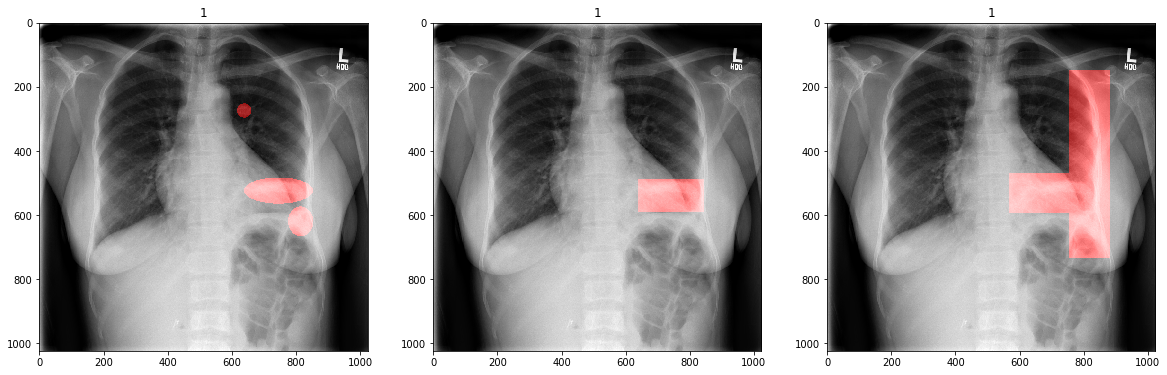

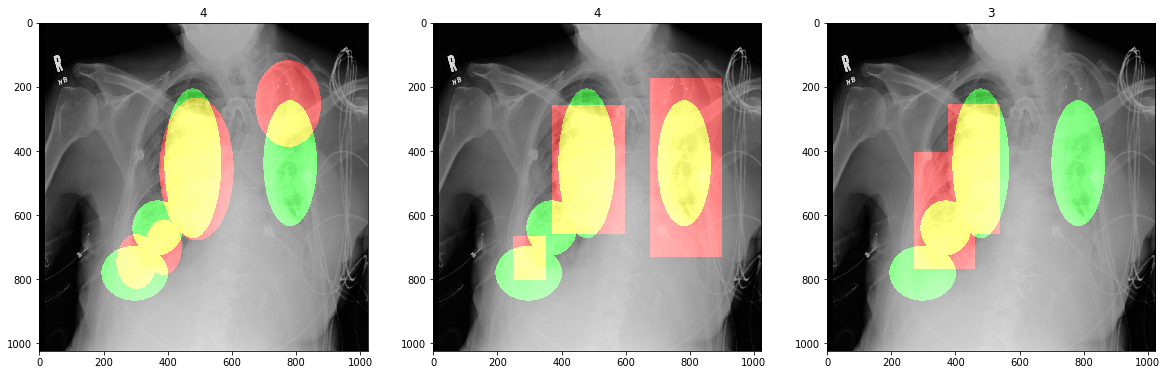

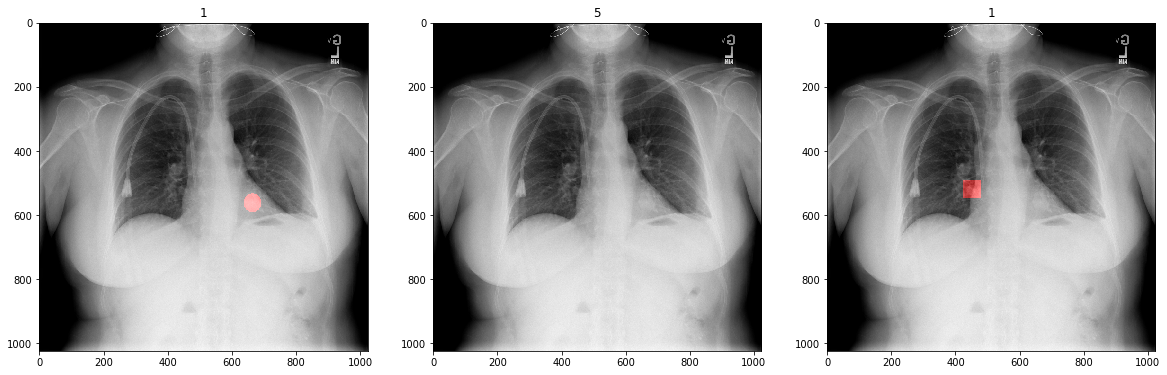

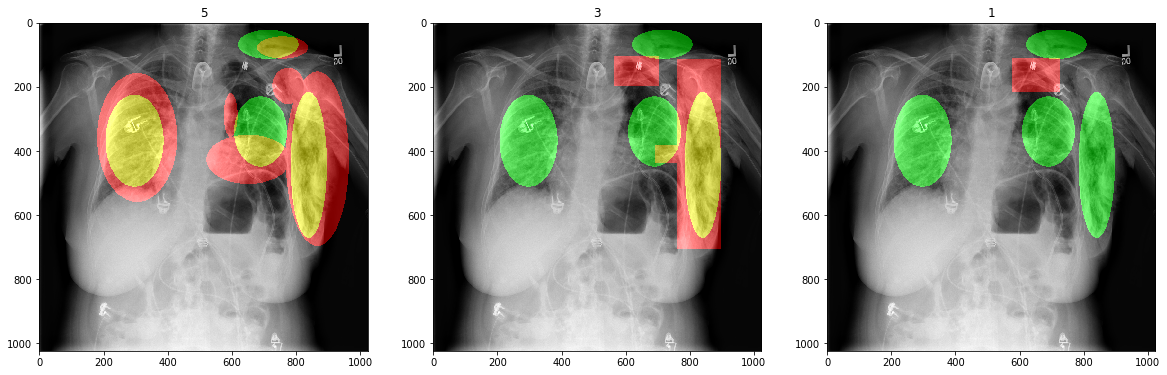

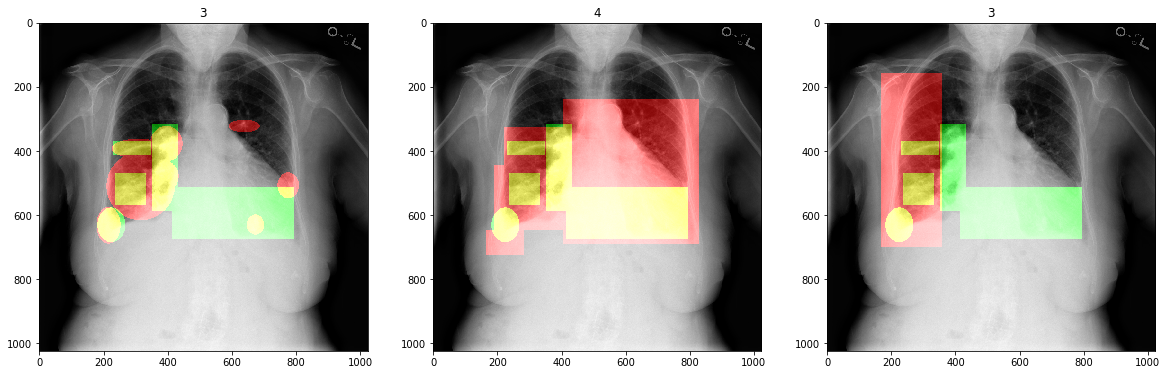

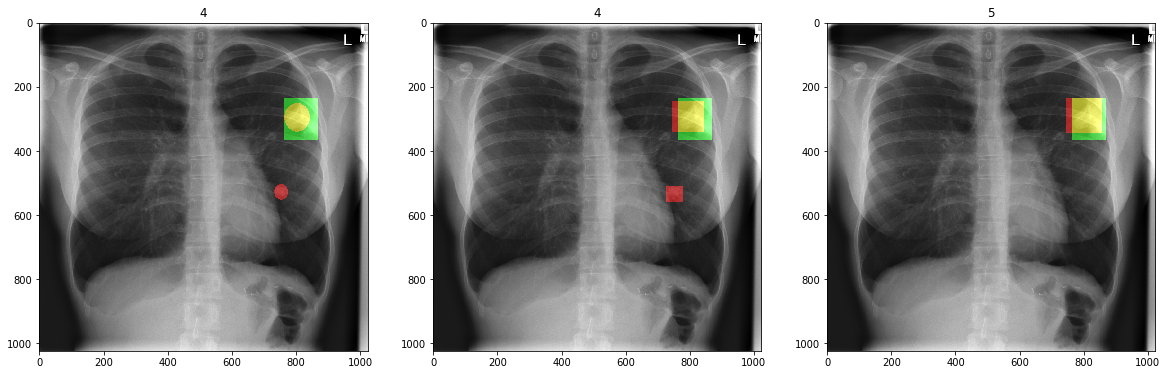

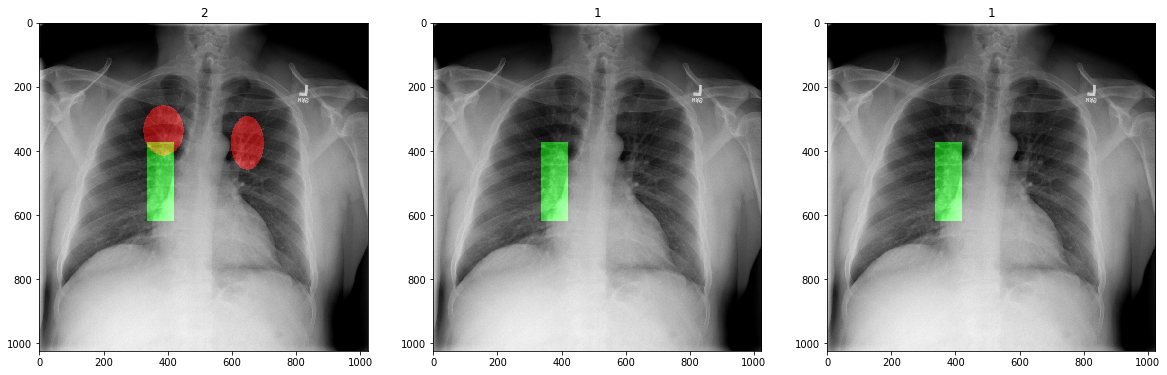

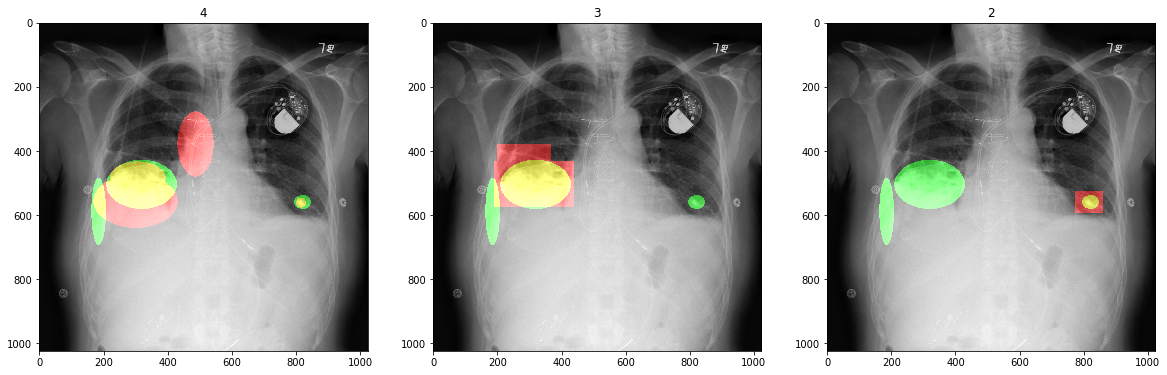

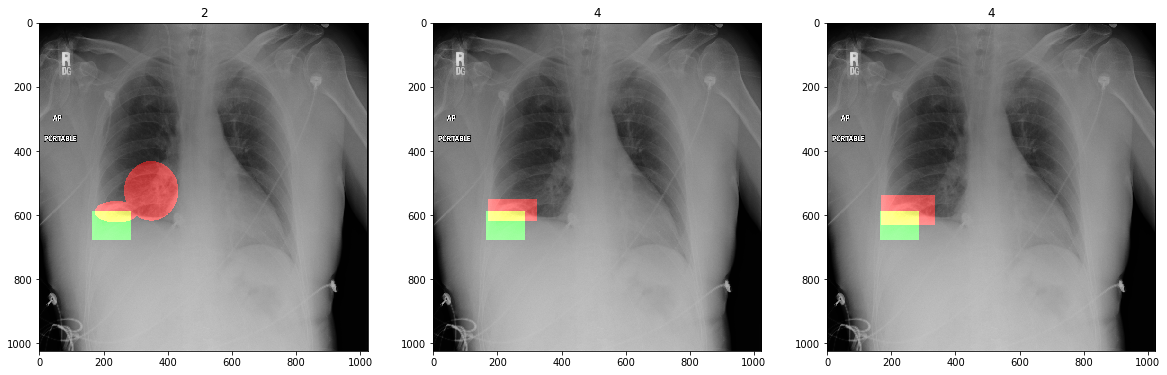

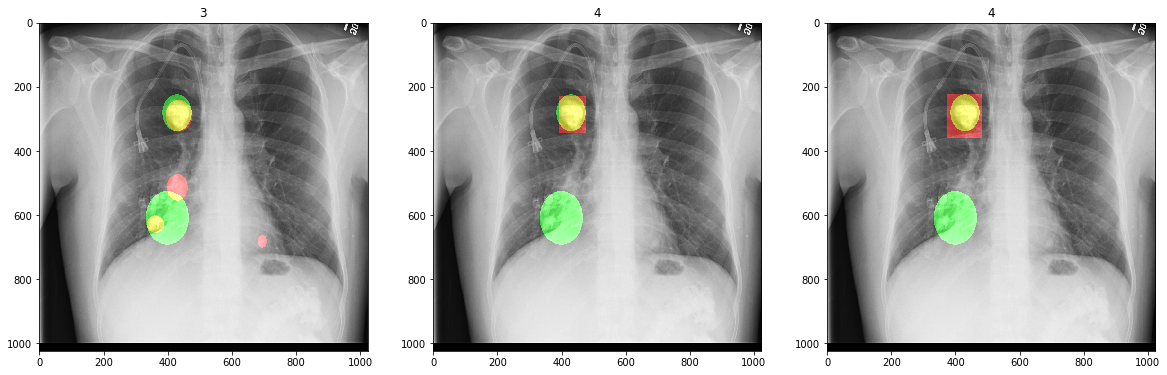

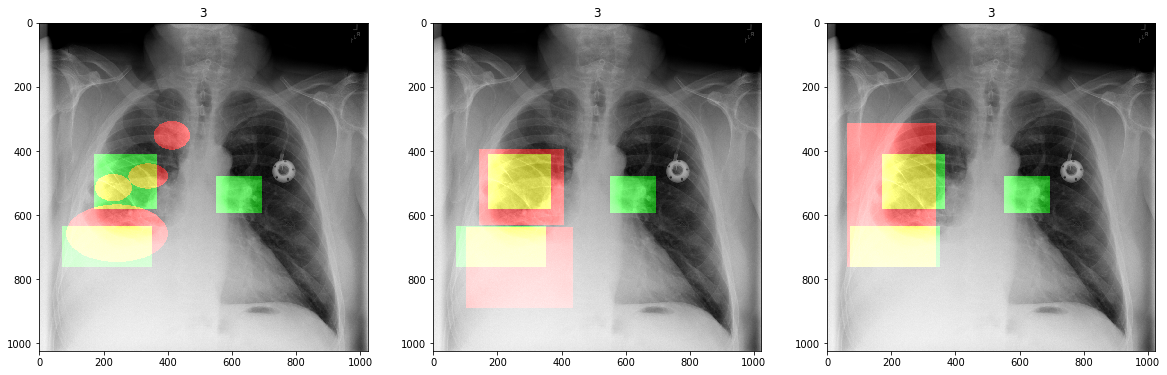

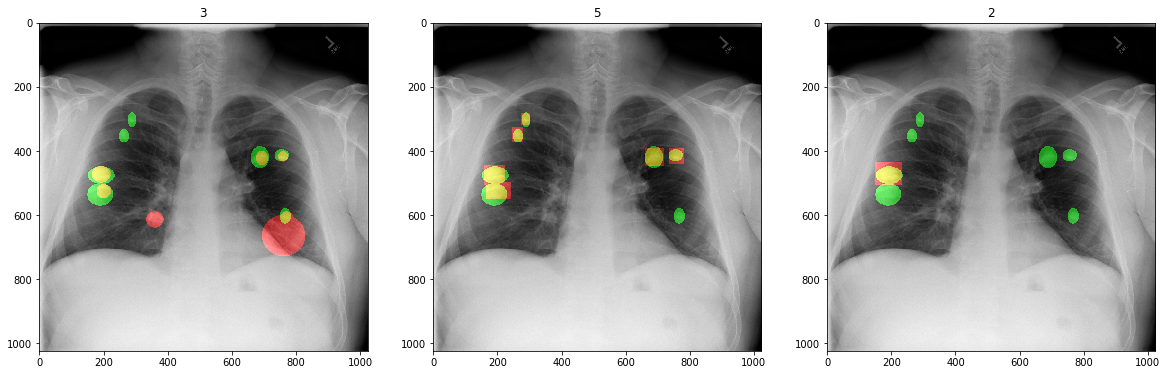

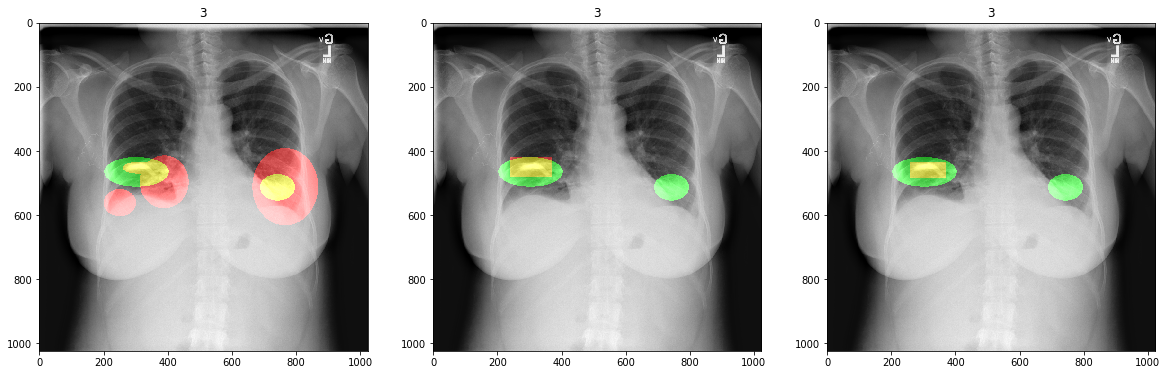

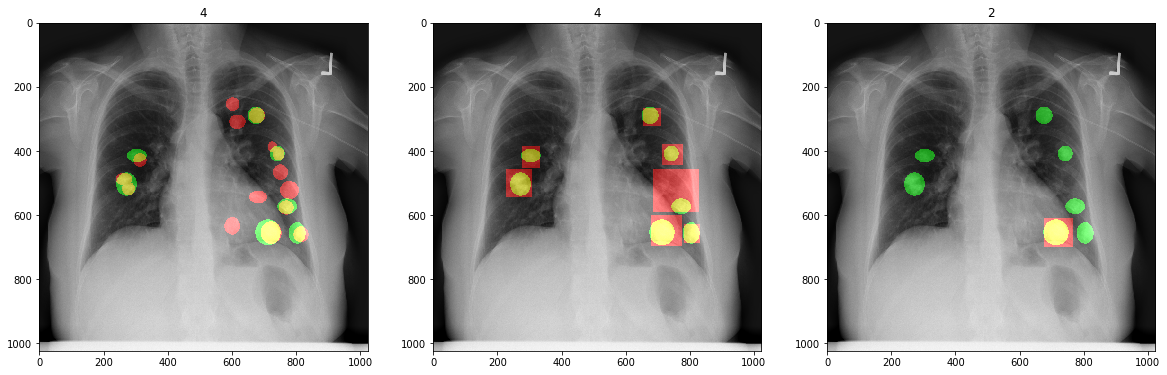

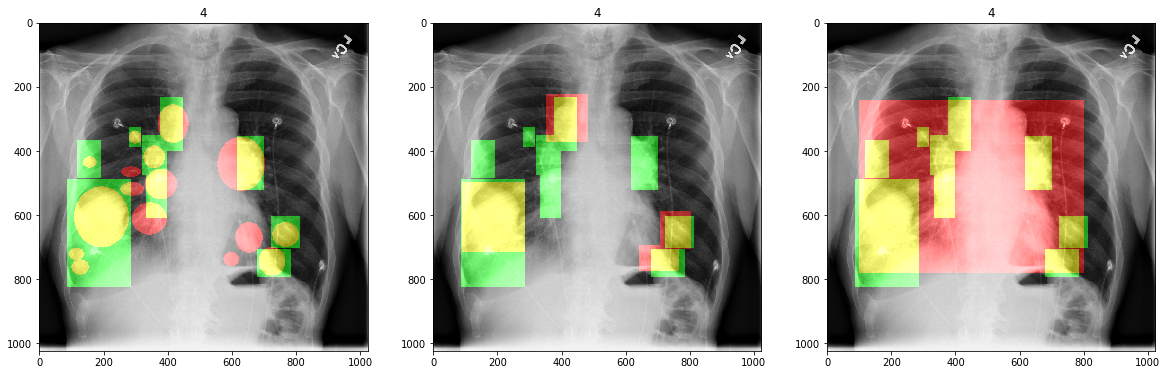

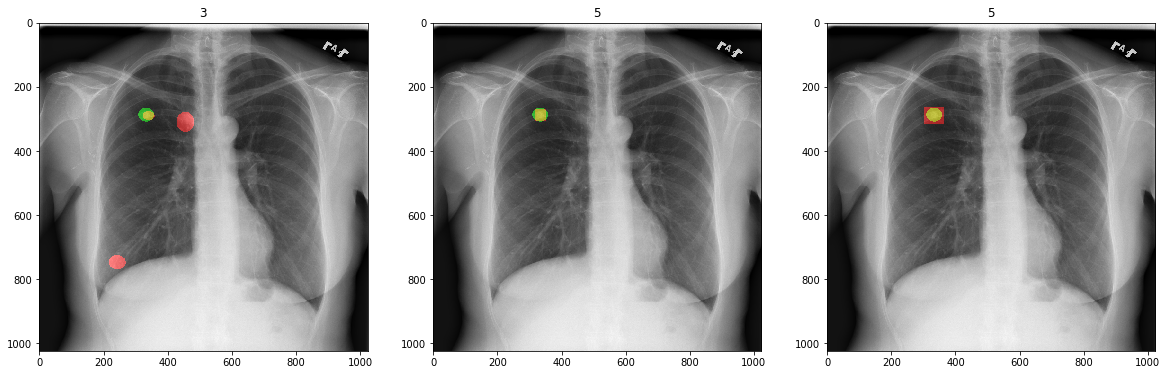

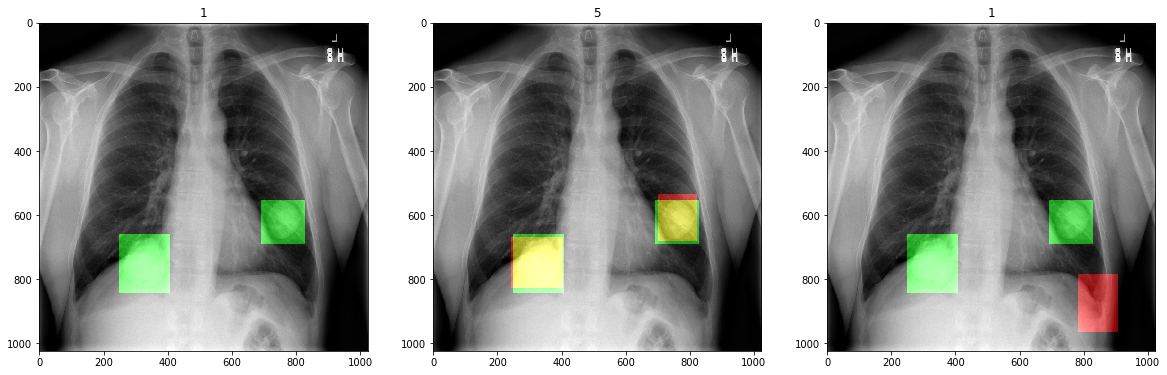

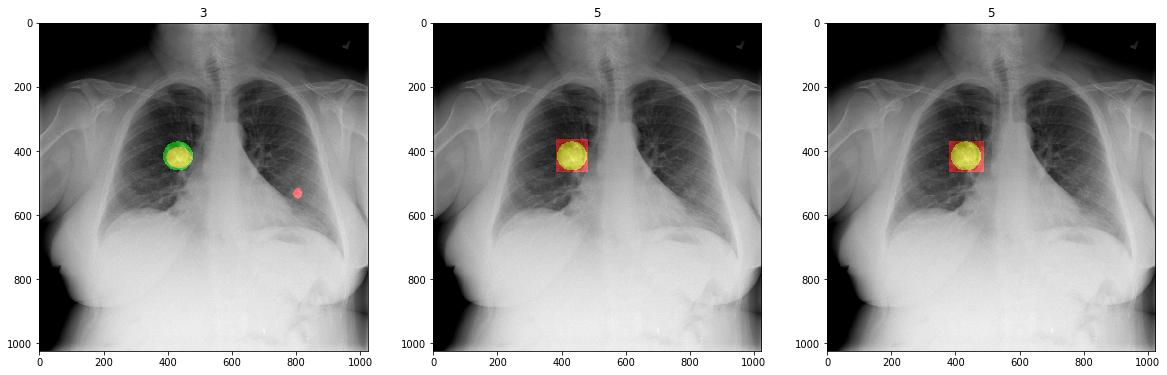

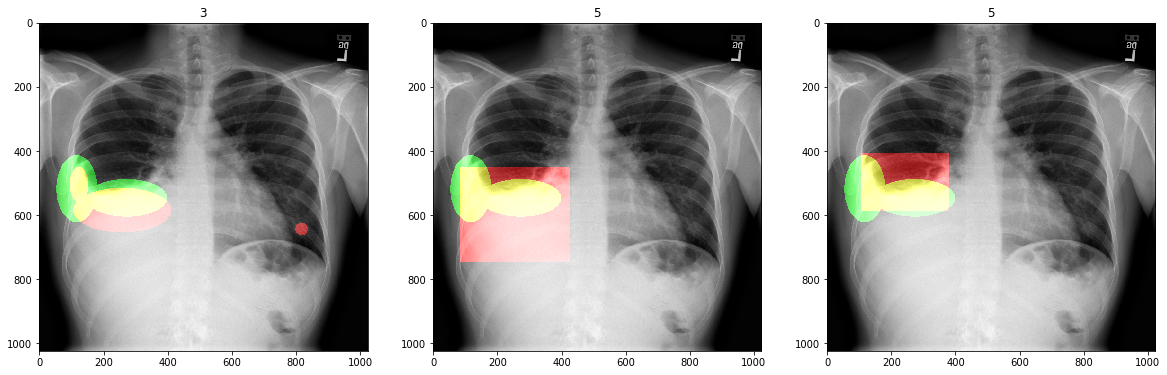

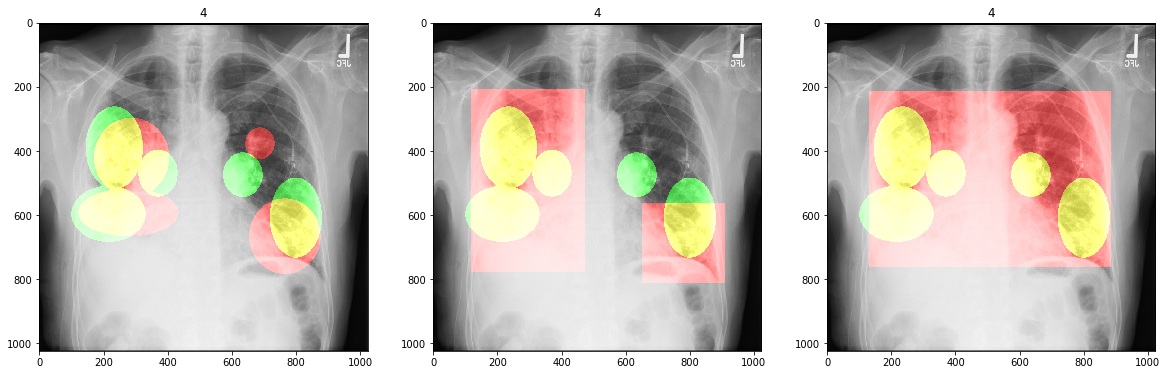

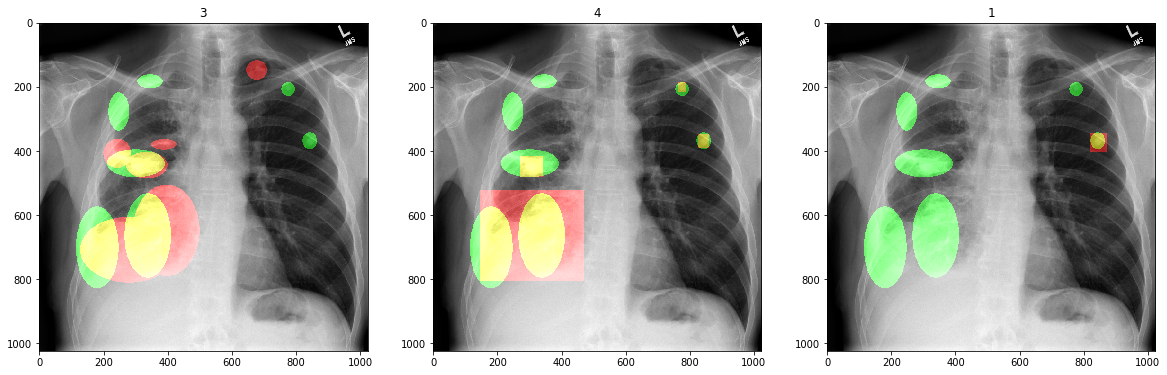

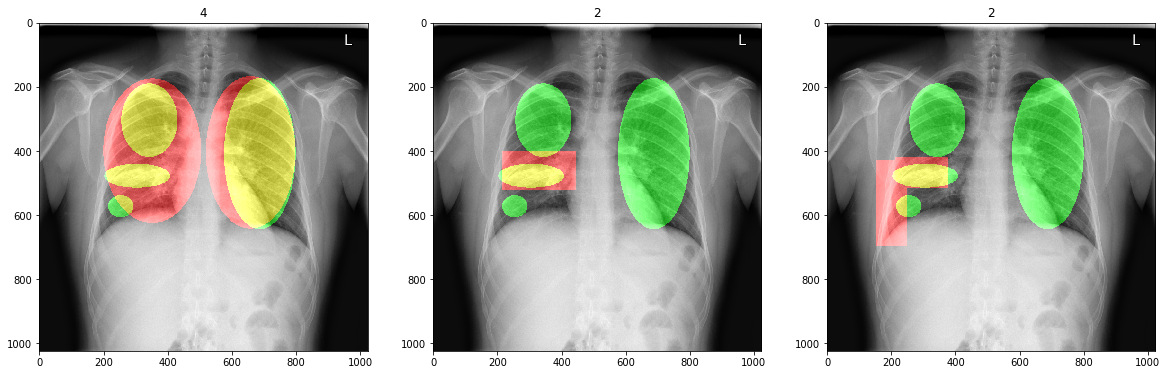

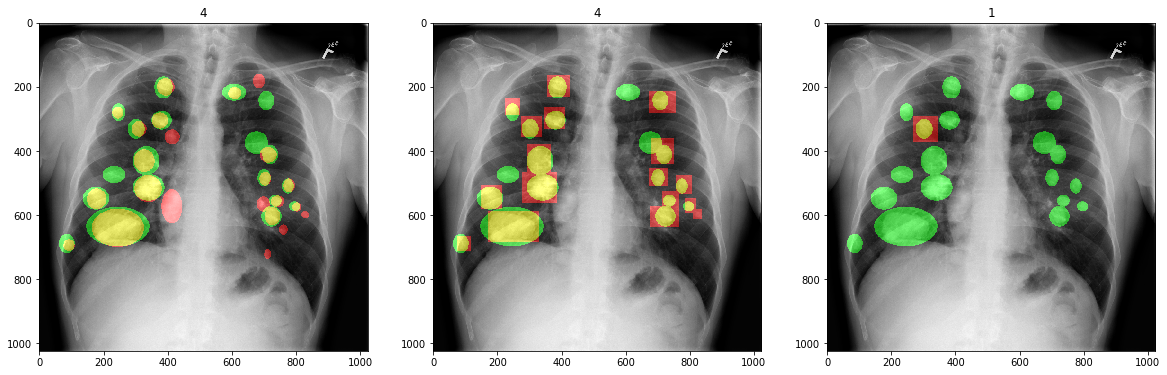

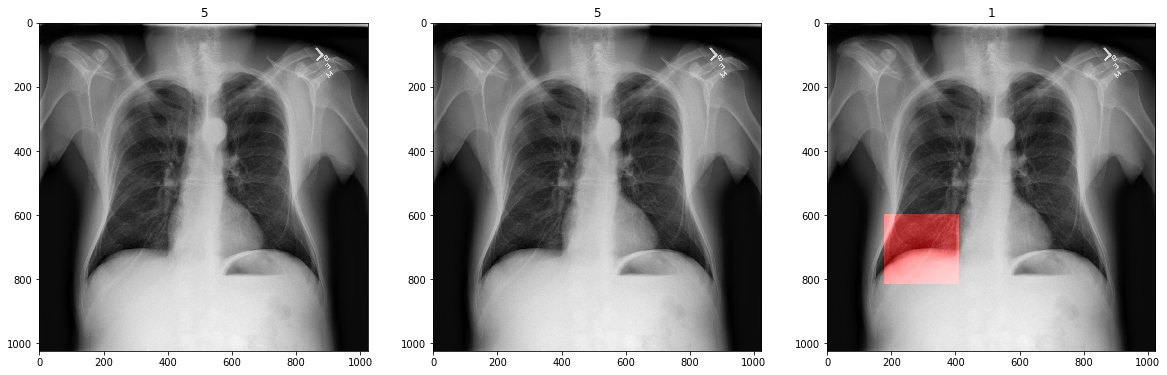

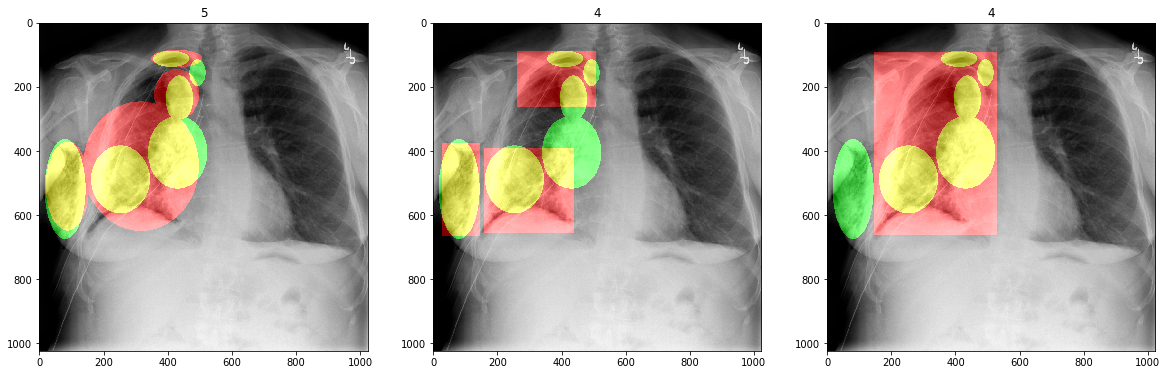

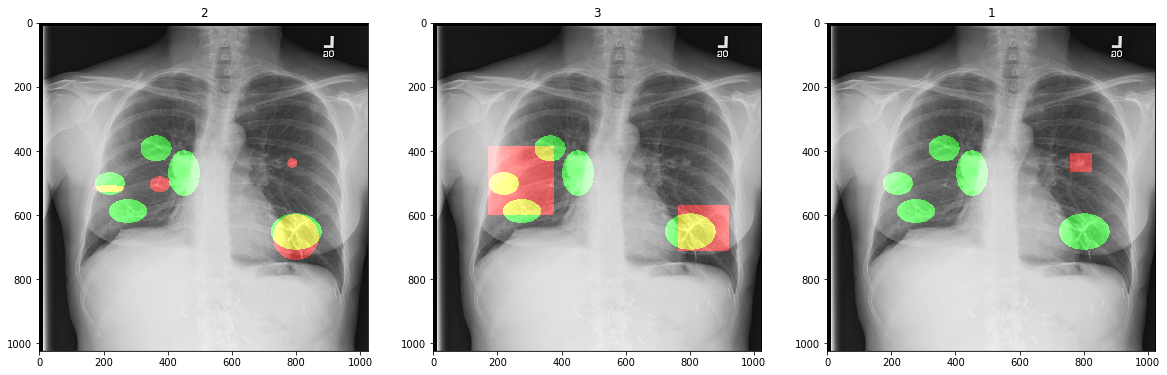

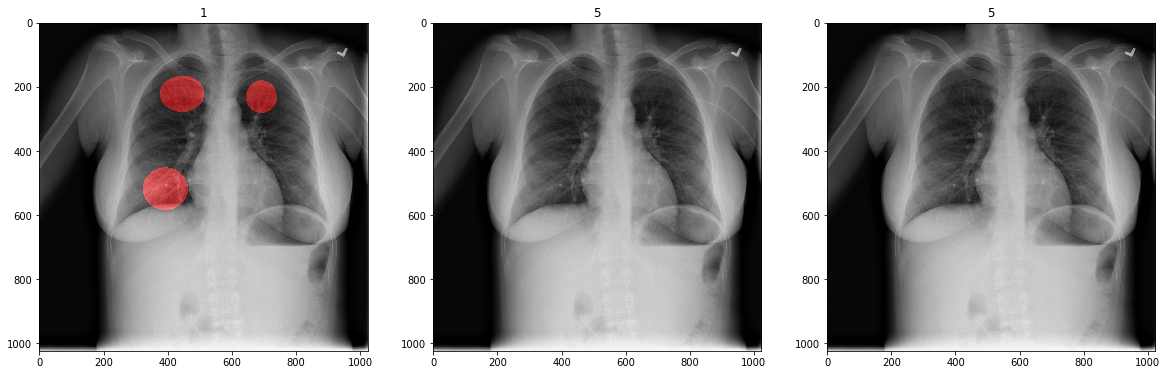

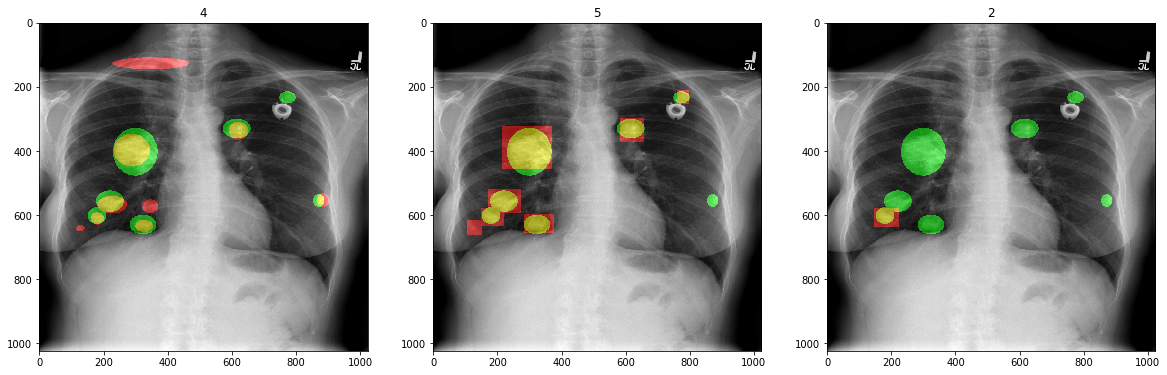

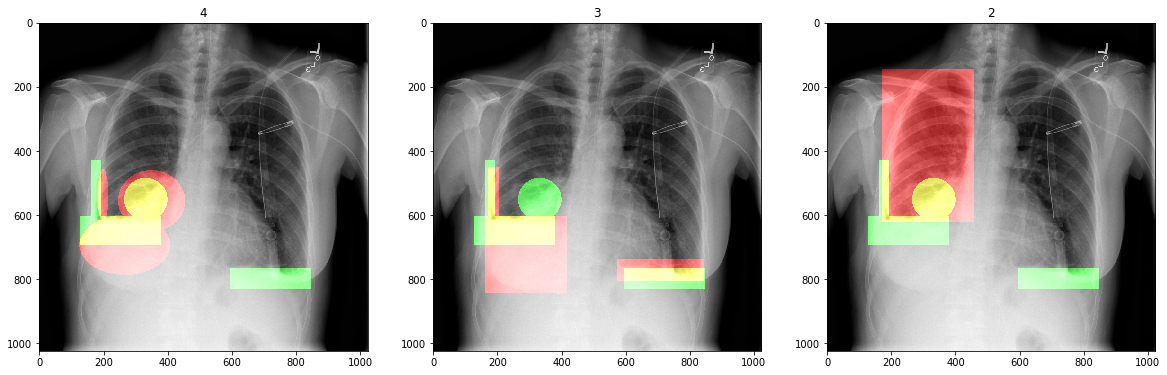

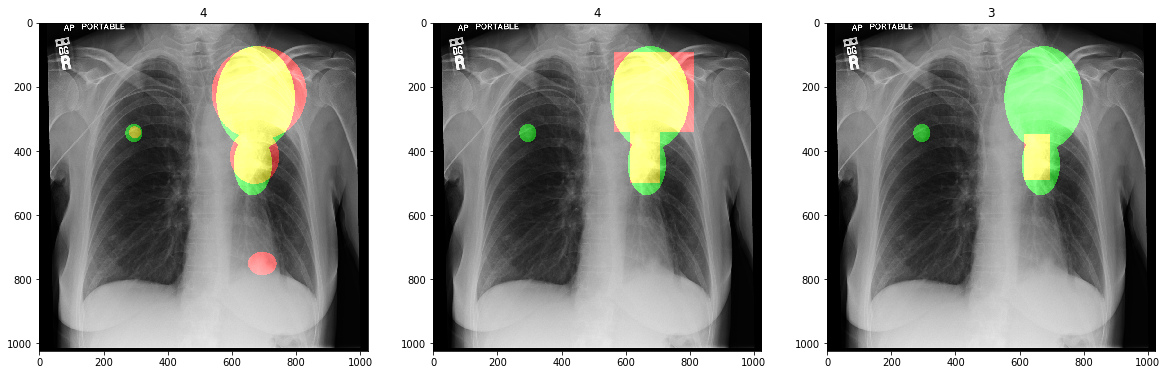

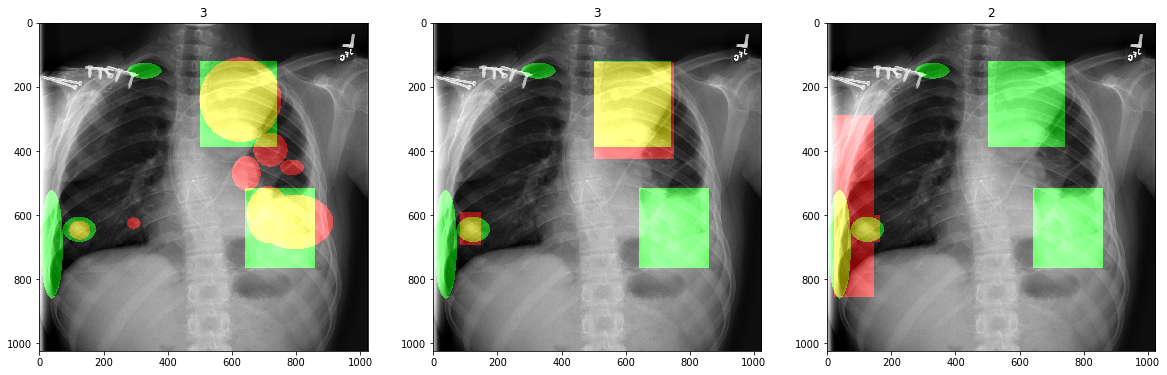

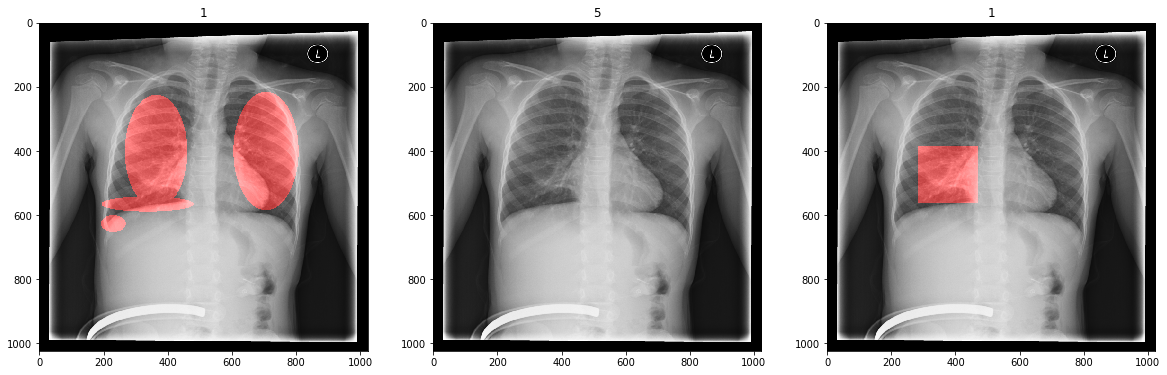

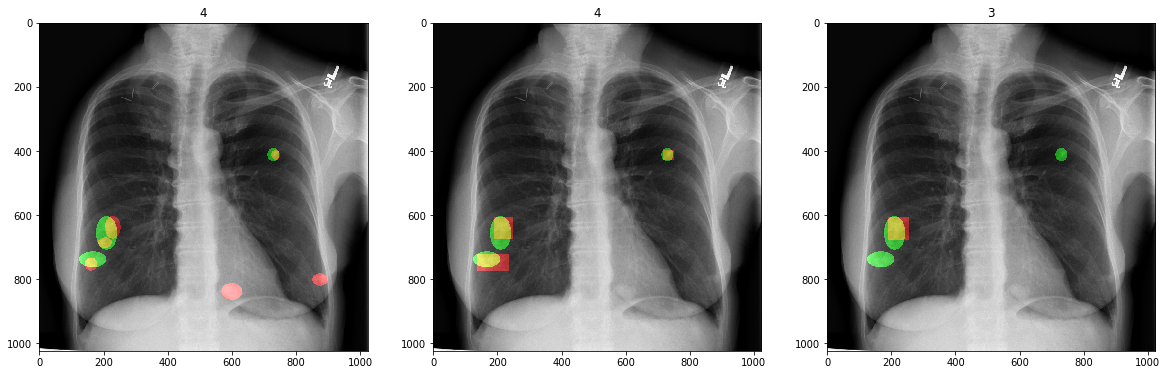

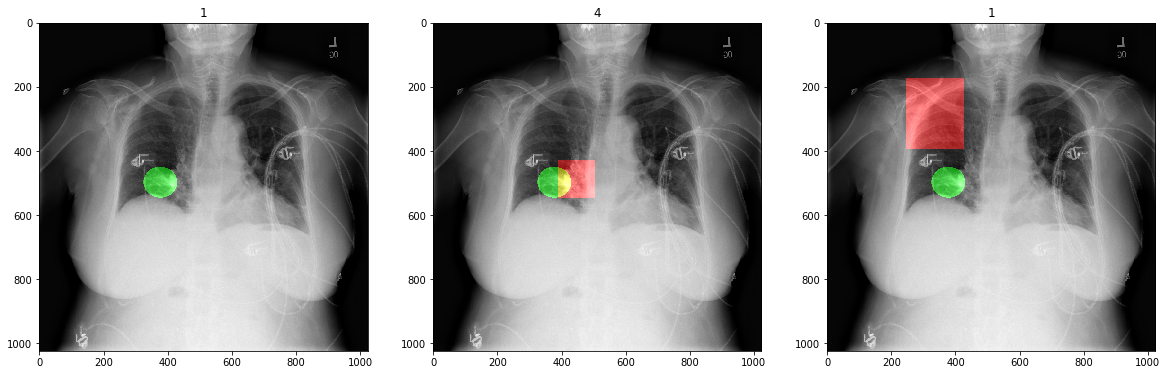

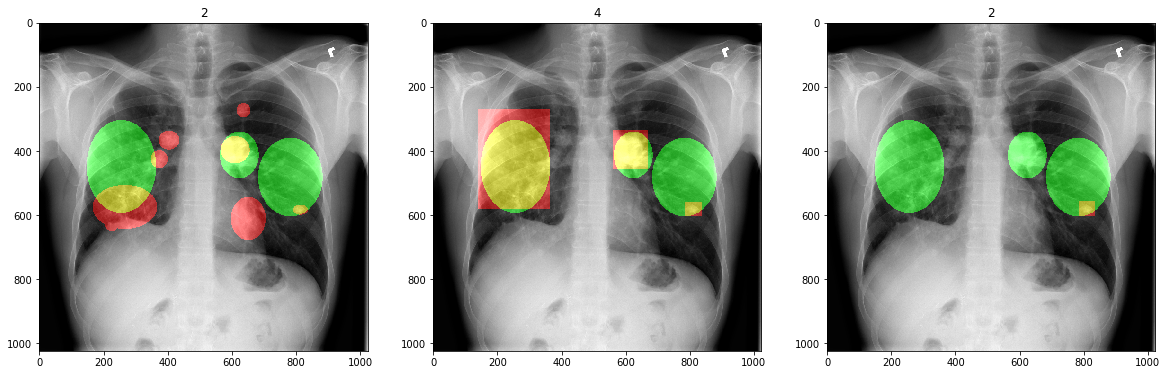

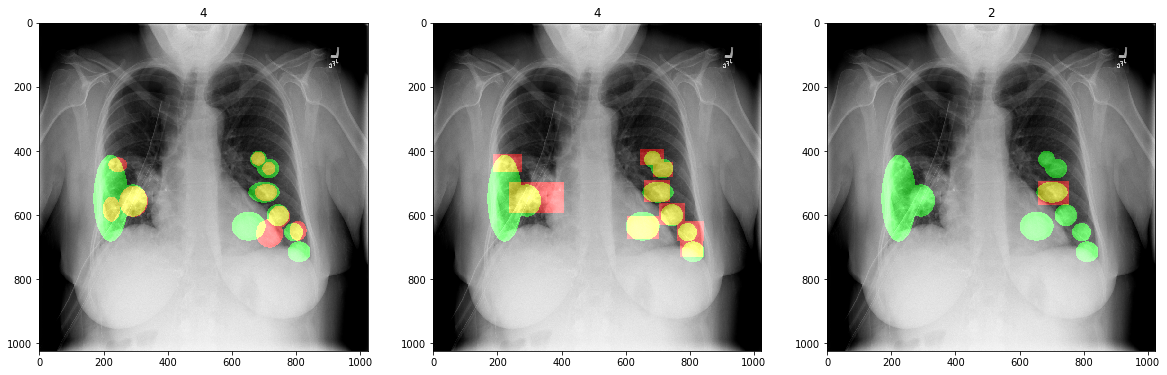

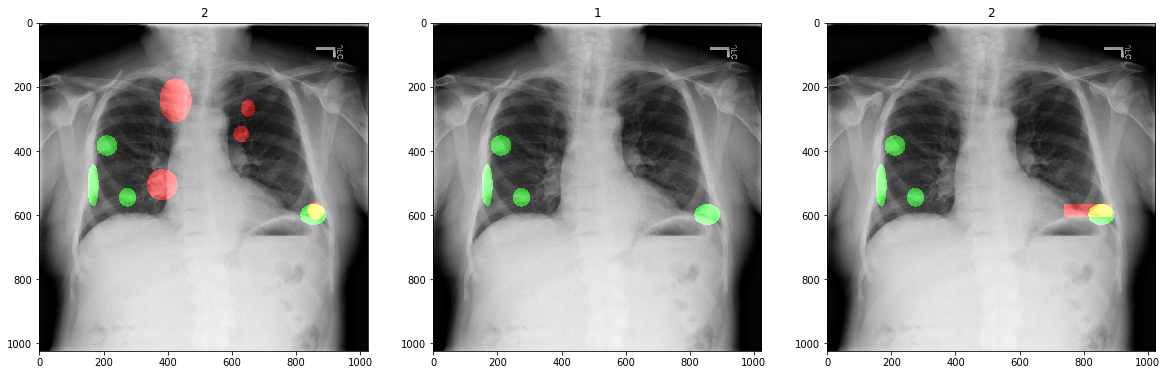

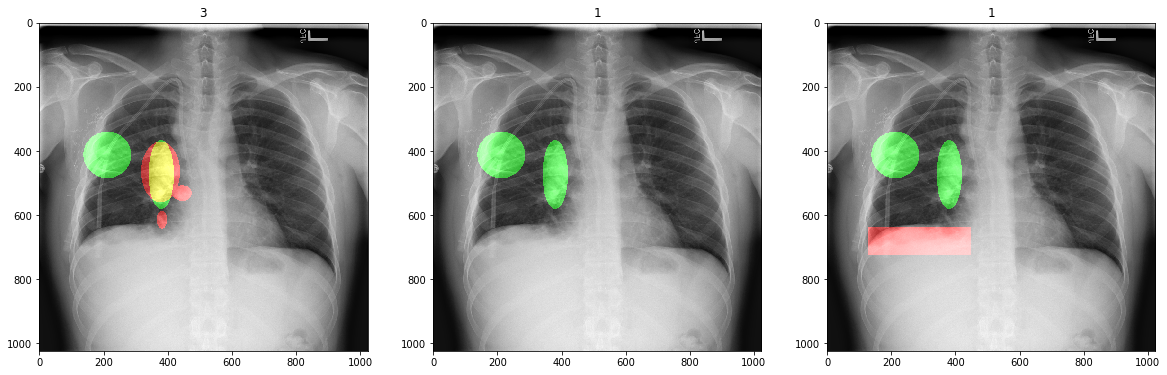

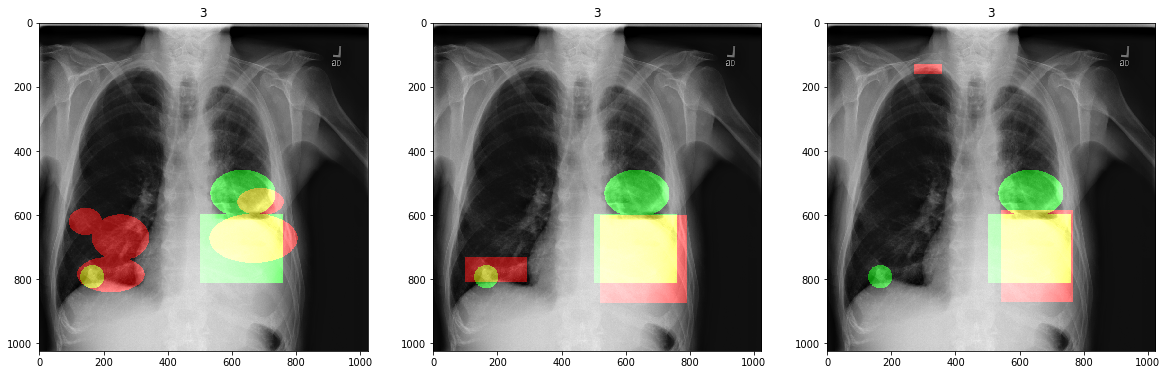

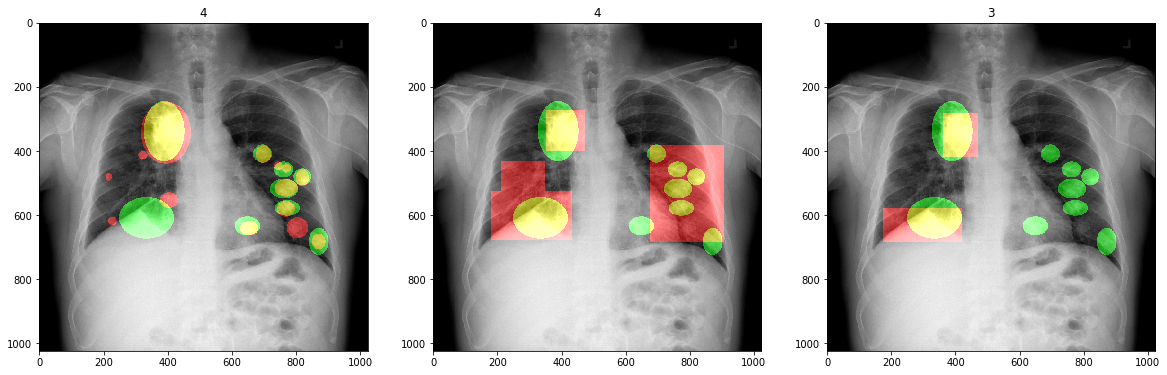

In [8]:
for key in keys[60:100]: 
    plt.figure(figsize=(20,10))
    plt.subplot(131)
    plt.imshow(
        blend(
            colorize(origin[key], [1, 1, 1]),
            colorize(expert[key], [0, 1, 0]),
            colorize(sample_1[key], [1, 0, 0])        
        )
    )
    plt.title(f"{scores[key][0] if key in scores else ''}")
    plt.subplot(132)
    plt.title(f"{scores[key][1] if key in scores else ''}")
    plt.imshow(
        blend(
            colorize(origin[key], [1, 1, 1]),
            colorize(expert[key], [0, 1, 0]),
            colorize(sample_2[key], [1, 0, 0])        
        )
    )
    plt.subplot(133)
    plt.imshow(
        blend(
            colorize(origin[key], [1, 1, 1]),
            colorize(expert[key], [0, 1, 0]),
            colorize(sample_3[key], [1, 0, 0])        
        )
    )
    plt.title(f"{scores[key][2] if key in scores else ''}")
    plt.show()